In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####  1) Обрати одну з компаній
##### Моїм вибором стала компанія Tesla

In [4]:
teslaFrame = pd.read_csv('TSLA.csv')

In [5]:
teslaFrame.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-02-14,23.639999,25.49,22.559999,23.180000,23.180000,11341000
1,2011-02-21,22.879999,23.85,21.110001,23.610001,23.610001,6071800
2,2011-02-28,23.740000,24.99,23.500000,24.950001,24.950001,5041200
3,2011-03-07,24.930000,25.40,23.530001,24.070000,24.070000,6306100
4,2011-03-14,23.820000,24.00,21.799999,22.959999,22.959999,5265000


###### Дані мають бути за 10 років, але Тесла на є на ринку ще 10 років, тому було відібрано дані від 14 лютого 2011 до 12 лютого 2018

In [6]:
print("Max date: "+np.max(teslaFrame.Date))
print("Min date: "+np.min(teslaFrame.Date))

Max date: 2018-02-12
Min date: 2011-02-14


###### В якості параметра для 𝑟 𝑚 𝑝 візьмем дані S&P 500 (^GSPC) про щомісячний прибуток за той самий період

In [7]:
sp500 = pd.read_csv('GSPC.csv')

In [8]:
#Переконалися, що дані S&P за той самий період
print("Max date: "+np.max(sp500.Date))
print("Min date: "+np.min(sp500.Date))

Max date: 2018-02-12
Min date: 2011-02-14


1) експоненційна: 
    i) 𝑦=𝛼𝛽𝑥,
    ii) 𝑦 = α𝑒𝑏1𝑥, 
    iii) 𝑦 = 𝑒𝑏0+𝑏1𝑥, 
    iv) 𝑦=10𝑎+𝑏𝑥;

In [9]:
x = (sp500.High+sp500.Low)/2.0
y = (teslaFrame.High+teslaFrame.Low)/2.0

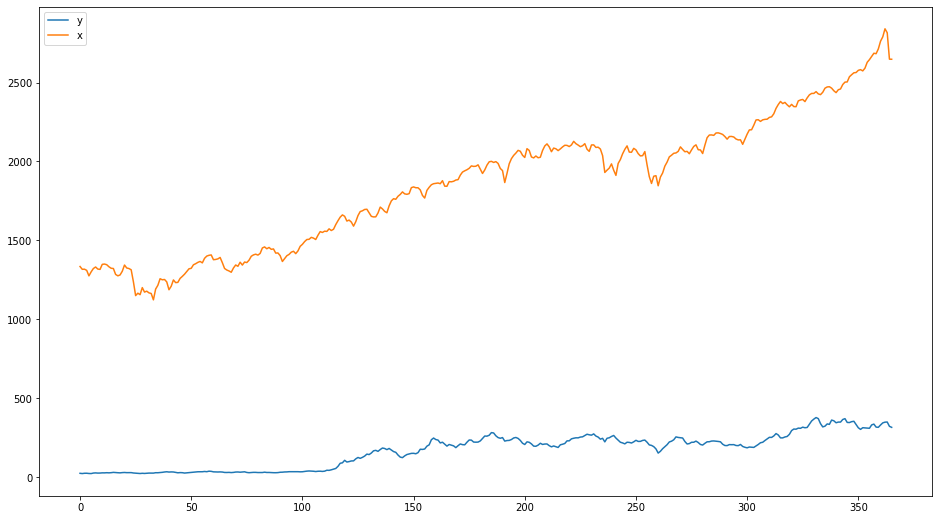

In [10]:
#Відобразимо x та y на графіку
plt.figure(figsize=(16, 9))
plt.plot(y, label='y')
plt.plot(x, label='x')
plt.legend()

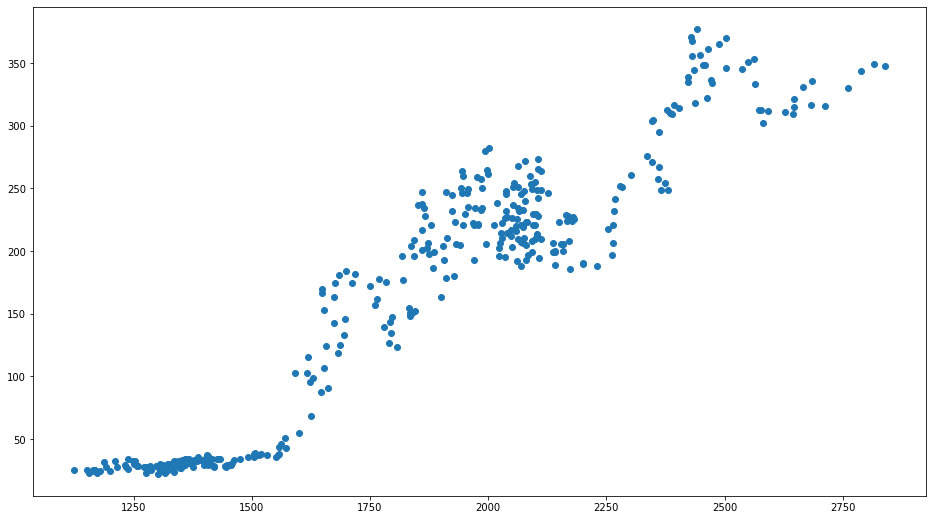

In [11]:
plt.figure(figsize=(16, 9))
plt.scatter(x,y)

In [12]:
def calcR(x,y):
    return (np.cov(x,y)/(np.sqrt(np.var(x)*np.var(y))))[0][1]
def SSE(y,y_pred):
    sse = 0
    for k in range(len(y)):
        sse+=((y[k]-y_pred[k])**2)
    return sse
def SSR(y_pred,y_mean):
    ssr = 0
    for k in range(len(y_pred)):
        ssr+=((y_pred[k]-y_mean)**2)
    return ssr
def SST(ssr,sse):
    return ssr+sse
def calcR_sq(x,y,y_pred):
    ssr = SSR(y_pred,np.mean(y))
    sse = SSE(y,y_pred)
    return ssr/SST(ssr,sse)
def F(x,y,y_pred): 
    n = len(x)
    m = 1
    F_ch = 0
    y_pred_mean = np.mean(y_pred)
    for k in y_pred:
        F_ch+=(k-y_pred_mean)**2
    F_zn = 0
    for k in range(len(y)):
        F_zn+=(y[k]-y_pred[k])**2
    F = (F_ch/m)*((n-m-1)/F_zn)
    return F
def calcAlphaBetaPreds(x,y):
    beta = sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x) * np.std(x)** 2)
    alpha = np.mean(y) - beta * np.mean(x)
    preds = []
    for k in x:
        preds.append(alpha+beta*k)
    return alpha,beta,preds

In [13]:
#1 alpha*beta**x
# y = ab**x
# ln(y) = ln(a)+ln(b)*x
# Вираховуємо альфа та бета
alpha,beta,preds = calcAlphaBetaPreds(x,np.log(y))
print('Alpha: {}, beta: {}'.format(alpha,beta))

Alpha: 0.7837463894000627, beta: 0.002149598995146187


In [14]:
print("r: {}, R**2: {}, F: {}".format(calcR(x,np.log(y)),calcR_sq(x,np.log(y),np.exp(preds)),F(x,np.log(y),np.exp(preds))))
r1 = calcR(x,np.log(y))
R_sq1= calcR_sq(x,np.log(y),np.exp(preds))
F1 = F(x,np.log(y),np.exp(preds))

r: 0.9229514128689642, R**2: 0.5009720322182857, F: 175.73494861035252


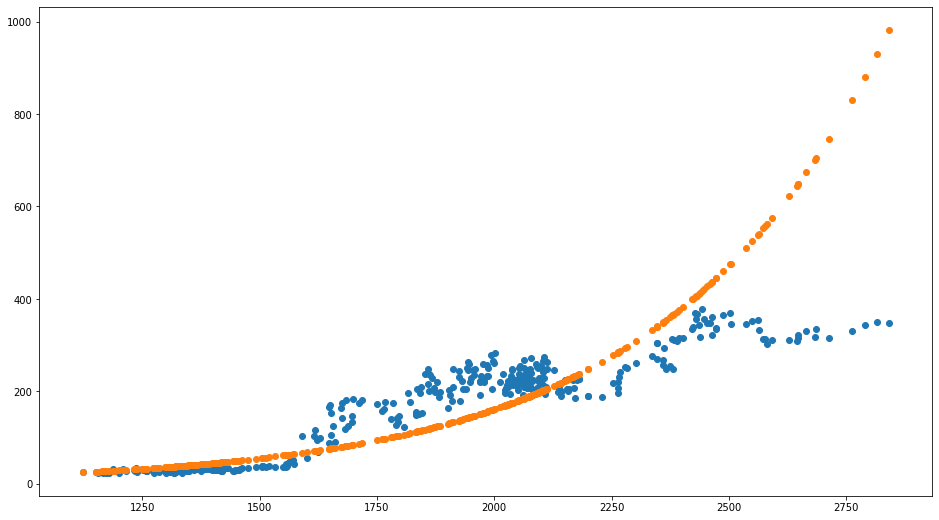

In [15]:
plt.figure(figsize=(16, 9))
plt.scatter(x, y)
plt.scatter(x, np.exp(preds))
plt.show();

In [16]:
# степенева (мультипликативна): 𝑦 = 𝛼𝑥𝛽
alpha,beta,preds = calcAlphaBetaPreds(np.log(x),np.log(y))
print('Alpha: {}, beta: {}'.format(alpha,beta))

Alpha: -25.00691830395882, beta: 3.9704027507674815


In [17]:
print("r: {}, R**2: {}, F: {}".format(calcR(np.log(x),np.log(y)),calcR_sq(np.log(x),np.log(y),np.exp(preds)),F(np.log(x),np.log(y),np.exp(preds))))
r2 = calcR(np.log(x),np.log(y))
R_sq2= calcR_sq(np.log(x),np.log(y),np.exp(preds))
F2 = F(np.log(x),np.log(y),np.exp(preds))

r: 0.9486672531142366, R**2: 0.5011028220855976, F: 149.498404399993


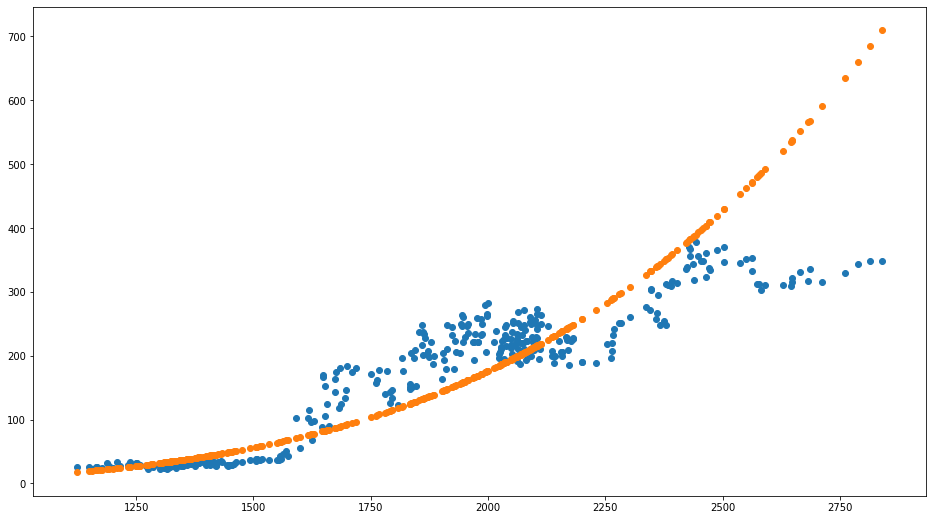

In [18]:
plt.figure(figsize=(16, 9))
plt.scatter(x, y)
plt.scatter(x, np.exp(preds))
plt.show();

In [19]:
# зворотна: 𝑦=𝛽 +𝛽1/x

In [20]:
alpha,beta,preds = calcAlphaBetaPreds(1/x,y)
print('Alpha: {}, beta: {}'.format(alpha,beta))

Alpha: 595.840079064062, beta: -754058.7120795894


In [21]:
print("r: {}, R**2: {}, F: {}".format(calcR(1/x,y),calcR_sq(1/x,y,preds),F(1/x,y,preds)))
r3 = calcR(1/x,y)
R_sq3= calcR_sq(1/x,y,preds)
F3 = F(1/x,y,preds)

r: -0.9458249406101521, R**2: 0.8897030548491996, F: 2936.182063087346


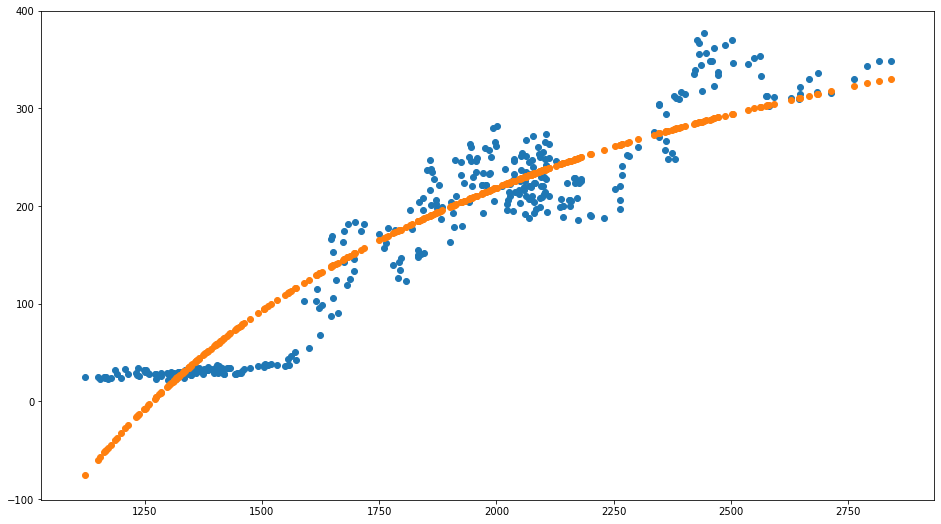

In [22]:
plt.figure(figsize=(16, 9))
plt.scatter(x, y)
plt.scatter(x, preds)
plt.show();

In [23]:
print("r1:{},r2:{},r3:{}, the biggest r{}".format(r1,r2,r3,np.argmax(np.array([r1,r2,r3]))+1))

r1:0.9229514128689642,r2:0.9486672531142366,r3:-0.9458249406101521, the biggest r2


In [24]:
print("R_sq1:{},R_sq2:{},R_sq3:{}, the biggest R_sq{}".format(R_sq1,R_sq2,R_sq3,np.argmax(np.array([R_sq1,R_sq2,R_sq3]))+1))

R_sq1:0.5009720322182857,R_sq2:0.5011028220855976,R_sq3:0.8897030548491996, the biggest R_sq3


In [25]:
print("F1:{},F2:{},F3:{}".format(F1,F2,F3))

F1:175.73494861035252,F2:149.498404399993,F3:2936.182063087346


In [26]:
#Найкраща за результатами третя модель - треба її дослідити

#### Побудувати довірчий діапазон для регресійних значень 𝑦̂ (з рівнем довіри 95%)

In [27]:
from scipy import stats
t_crit = stats.t.ppf(q=1-0.025,df=len(y))

In [28]:
def sp_y_pred(x,y,y_pred):
    mean, var = np.mean(x), np.var(x)
    n = len(y)
    e = y-y_pred
    su_2 = n*np.var(e)/(n-2)
    a = su_2/n
    b = (1+(x-mean)**2)/var
    return np.sqrt(a*b)
def calcualte_interval(val,sp_val,t_crit): 
    return (val-sp_val*t_crit,val+sp_val*t_crit)

In [31]:
l,r = calcualte_interval(preds,sp_y_pred(x,y,preds),t_crit)

In [33]:
interval = pd.DataFrame(np.array([l,preds,r,]).T,columns=['low','pred','high'])
interval

,low,pred,high
0,26.096078,30.722694,35.349310
1,18.317741,23.101745,27.885750
2,18.692573,23.469087,28.245601
3,15.306401,20.150241,24.994081
4,-0.674435,4.477137,9.628708
...,...,...,...
361,317.245685,325.518240,333.790795
362,321.647994,330.372729,339.097464
363,319.495147,327.996496,336.497845
364,304.060283,311.078997,318.097711


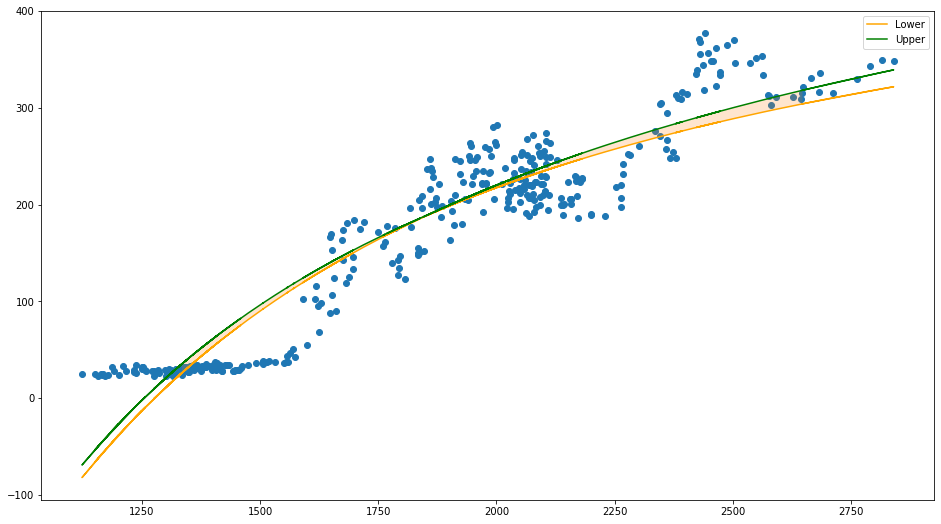

In [34]:
plt.figure(figsize=(16,9))

plt.scatter(x,y)
plt.plot(x, interval['low'],color='orange',label='Lower')
plt.plot(x,interval['high'],c='green',label='Upper')
plt.fill_between(x,interval['low'],interval['high'],alpha=0.2)
plt.legend();

#### Зробіть прогноз на наступний місяць, якщо ринок підніметься на 20% від попереднього місяця, та побудуйте довірчий інтервал.